In [4]:
# system lib
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn import model_selection

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier  #随机森林
from sklearn import tree

#用于参数搜索
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, auc #绘制ROC曲线
import pylab as pl

from time import time
import datetime
import numpy as np

print("complete")

complete


In [5]:
import pickle
from sklearn.model_selection import cross_validate
import pandas as pd

print("complete")

complete


In [6]:
def load_data(filename):
    """根据数据格式，读取数据中的X和分类标签y
    """

    return x_data, ylabel

def evaluate_classifier( real_label_list,predict_label_list):
    """
       return Precision, Recall and ConfusionMatrix
       Input : predict_label_list,real_label_list
    """
    msg=''
    Confusion_matrix = confusion_matrix( real_label_list,predict_label_list)
    msg += '\n Confusion Matrix\n ' + str(Confusion_matrix)
    precision = precision_score(real_label_list,predict_label_list, average=None)
    recall = recall_score(real_label_list,predict_label_list, average=None)
    msg += '\n Precision of tag 0 and 1 =%s' %str(precision)
    msg += '\n Recall of tag 0 and 1 =%s' %str(recall)

    return msg

def test_svm(train_file, test_file):
    """用SVM分类 """
    # use SVM directly

    train_xdata, train_ylabel = load_data(train_file)

    test_xdata, test_ylabel = load_data(test_file)

    print('\nuse SVM directly')

    #classifier1 = SVC(kernel='linear')
    #classifier1 = SVC(kernel='linear',probability=True, C=200, cache_size=500)
    classifier1 = SVC(kernel='linear',probability=True,C=10, cache_size=500)

    classifier1.fit(train_xdata, train_ylabel)

    predict_labels = classifier1.predict(test_xdata)
    accuracy = accuracy_score(test_ylabel, predict_labels)
    print("\n The Classifier's Accuracy is : %f" %accuracy)
    #
    eval_msg = evaluate_classifier(test_ylabel,predict_labels)
    print(eval_msg)
    #
    #GridSearchCV搜索最优参数示例
    print("GridSearchCV搜索最优参数......")
    t0 = time()
    param_grid = {
        "C": [1e3, 5e3, 1e4, 5e4, 1e5],
        "gamma": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
    }
    classifier1 = GridSearchCV(SVC(kernel="rbf", class_weight="balanced",probability=True), param_grid)
    classifier1 = classifier1.fit(train_xdata, train_ylabel)
    print("done in %0.3fs" % (time() - t0))
    print("Best estimator found by grid search:")
    print(classifier1.best_estimator_)


    #对于SVM来说，概率是通过交叉验证得到的，与其预测的结果未必一致，对小数据集来说，此概率没什么意义
    probas_ = classifier1.predict_proba(test_xdata)

    #对于二分类问题，可为分类器绘制ROC曲线，计算AUC
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(test_ylabel, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    # Plot ROC curve
    pl.clf()
    pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    pl.plot([0, 1], [0, 1], 'k--')
    pl.xlim([0.0, 1.0])
    pl.ylim([0.0, 1.0])
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title('%s SVM ROC' %train_file)
    pl.legend(loc="lower right")
    pl.show()


In [7]:
data = pd.read_csv('/kaggle/input/preprocess-train/preprocess_train.csv')

In [8]:
# 使用平均数填充缺失值
data = data.fillna(data.mean())

In [9]:
print(data.describe())

         sample_id     feature0       feature1     feature2     feature3  \
count  6296.000000  6296.000000    6296.000000  6296.000000  6296.000000   
mean   3147.500000    63.748003  285239.586221     1.132154     1.177755   
std    1817.642979    38.489715   72644.008774     0.320382     1.490461   
min       0.000000   -34.739442 -575880.089809    -2.157527    -3.055975   
25%    1573.750000    48.145602  288358.400000     1.102452     0.350584   
50%    3147.500000    63.609268  288358.400000     1.105857     0.875418   
75%    4721.250000    71.931683  288358.400000     1.110334     1.363743   
max    6295.000000   463.739205  860586.441356     3.373289    14.456153   

          feature4     feature5     feature6      feature7      feature8  ...  \
count  6296.000000  6296.000000  6296.000000  6.296000e+03  6.296000e+03  ...   
mean    251.501641    11.553379     4.526707  8.634842e+10  8.238839e+04  ...   
std     141.786644    12.995523    17.906249  6.430692e+11  7.998810e+05

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
# 分割特征和标签
X = data.iloc[:, :-1]  # 特征
y = data.iloc[:, -1]   # 标签

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 可根据需求设置测试集比例和随机种子


In [12]:
# 求出各个列的方差
variances = X_train.var(axis=0)
print(variances)

sample_id     3.291326e+06
feature0      1.524526e+03
feature1      4.999518e+09
feature2      1.057878e-01
feature3      2.171464e+00
                  ...     
feature102    1.086364e+04
feature103    3.220143e+00
feature104    3.493834e+00
feature105    8.062620e+02
feature106    1.524351e+04
Length: 108, dtype: float64


In [13]:
# 展示方差大于0.1的特征
print(variances[variances > 0.1])
#  输出个数
print(len(variances[variances > 0.1]))

sample_id     3.291326e+06
feature0      1.524526e+03
feature1      4.999518e+09
feature2      1.057878e-01
feature3      2.171464e+00
                  ...     
feature102    1.086364e+04
feature103    3.220143e+00
feature104    3.493834e+00
feature105    8.062620e+02
feature106    1.524351e+04
Length: 103, dtype: float64
103


In [14]:
# 选择方差大于0.1的特征
X_train = X_train.loc[:, variances > 0.1]

In [15]:
# 对于test集选择相同的特征
X_test = X_test.loc[:, variances > 0.1]

In [16]:
# 特征归一化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # 注意这里是fit_transform
X_test = scaler.transform(X_test) # 注意这里是transform

print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)


X_train.shape: (5036, 103)
X_test.shape: (1260, 103)


In [17]:
# 方差选择法数据预处理
from sklearn.feature_selection import VarianceThreshold
# 创建VarianceThreshold对象
selector = VarianceThreshold(threshold=0.01)

# 在训练集上拟合并应用特征选择
X_train = selector.fit_transform(X_train)

# 在测试集上应用相同的特征选择
X_test = selector.transform(X_test)

print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)

X_train.shape: (5036, 103)
X_test.shape: (1260, 103)


In [18]:
y_train.head()

6052    3
5673    0
505     0
4563    0
272     0
Name: label, dtype: int64

In [19]:
classifier1 = SVC(kernel='linear',probability=True,C=10, cache_size=10000)
classifier1.fit(X_train, y_train)

SVC(C=10, cache_size=10000, kernel='linear', probability=True)

In [20]:
from sklearn.metrics import f1_score

predict_labels = classifier1.predict(X_test)
accuracy = accuracy_score(y_test, predict_labels)
print("\n The Classifier's Accuracy is : %f" %accuracy)
# 计算f1score
f1score = f1_score(y_test, predict_labels, average='macro')
print("\n The Classifier's f1score is : %f" %f1score)


 The Classifier's Accuracy is : 0.800000

 The Classifier's f1score is : 0.761745


In [21]:
classifier1 = SVC(kernel='linear',probability=True,C=10, cache_size=5000)
classifier1.fit(X_train, y_train)

SVC(C=10, cache_size=5000, kernel='linear', probability=True)

In [22]:
eval_msg = evaluate_classifier(y_test,predict_labels) # 评估分类器
print(eval_msg) # 打印评估结果


 Confusion Matrix
 [[595  12  19   8   4   0]
 [ 17  77  36   1   2   0]
 [ 45  33 127   0   2   0]
 [ 35   0   0  81   0   0]
 [ 11   5   8   2  53   0]
 [ 11   0   0   1   0  75]]
 Precision of tag 0 and 1 =[0.83333333 0.60629921 0.66842105 0.87096774 0.86885246 1.        ]
 Recall of tag 0 and 1 =[0.93260188 0.57894737 0.61352657 0.69827586 0.67088608 0.86206897]


In [23]:
print("GridSearchCV搜索最优参数......")
t0 = time()
param_grid = {
    "C": [1e3, 5e3, 1e4, 5e4, 1e5],
    "gamma": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}
classifier1 = GridSearchCV(SVC(kernel="rbf",probability=True), param_grid) #balance不需要 
classifier1 = classifier1.fit(X_train, y_train)

GridSearchCV搜索最优参数......


In [24]:
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:") # 打印最优参数
print(classifier1.best_estimator_) # 打印最优参数

done in 1648.757s
Best estimator found by grid search:
SVC(C=1000.0, gamma=0.01, probability=True)


In [25]:
probas_ = classifier1.predict_proba(X_test) # 对测试集进行预测
print(probas_)# 打印预测结果

[[8.16352005e-01 4.72888810e-03 1.85794708e-02 5.11117186e-03
  1.88482664e-03 1.53343638e-01]
 [1.17624569e-03 9.91515840e-01 7.20788640e-03 8.53304366e-05
  3.41857402e-06 1.12786217e-05]
 [3.85525281e-01 1.00403817e-01 4.85144233e-01 1.82651391e-02
  5.19696186e-03 5.46456703e-03]
 ...
 [1.03743669e-02 7.81040105e-02 9.09648308e-01 2.39132456e-04
  5.80256603e-05 1.57615693e-03]
 [8.14683901e-01 1.81305631e-02 1.58738115e-01 7.99358879e-05
  1.10428982e-04 8.25705647e-03]
 [3.94395040e-01 1.97109477e-02 2.62361233e-01 2.86343128e-01
  1.64460137e-02 2.07436376e-02]]


In [26]:
# 持久化保存获得的最优svm模型。
import joblib


joblib.dump(classifier1, 'svm_model.pkl')

['svm_model.pkl']

In [27]:
# 采用K-means进行分类

from sklearn.cluster import KMeans
from sklearn import metrics

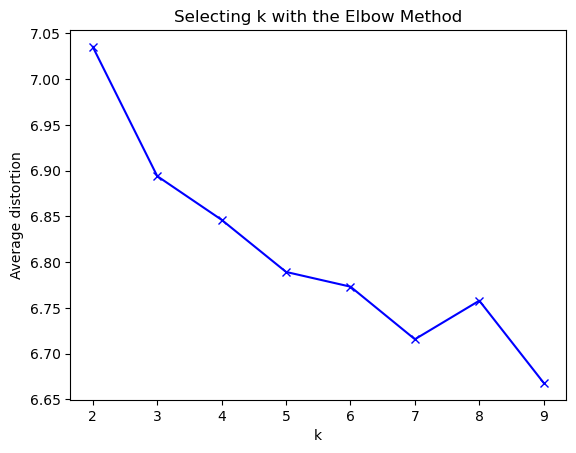

In [28]:
# 选择最优的K值

# 评估不同K值的聚类效果
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist


K = range(2, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    meandistortions.append(sum(np.min(cdist(X_train, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])

# 绘制K值与误差平方和的关系图
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [29]:
# k=9 评估
kmeans = KMeans(n_clusters=9)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
print(y_pred)

# 计算 accuarcy precision recall f1-score
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))


[7 7 4 ... 5 4 7]
0.0380952380952381
[[  8   0   0  27 296   0   7 300   0]
 [  5   1   0  10  41   0   1  43  32]
 [  0   0   0   0  63  64   0  80   0]
 [  0   0   0   0  49   0   0  67   0]
 [  0   0   0   0  39   0   0  40   0]
 [  0   0  37   0  23   0   0  27   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.62      0.01      0.02       638
           1       1.00      0.01      0.01       133
           2       0.00      0.00      0.00       207
           3       0.00      0.00      0.00       116
           4       0.08      0.49      0.13        79
           5       0.00      0.00      0.00        87
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.04      1260
   macro avg   

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# k=9 计算 accuracy precision recall f1score
kmeans = KMeans(n_clusters=2)   
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
print(y_pred)

# 计算accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n The Kmeans's Accuracy is : %f" %accuracy)
# 计算f1score

f1score = f1_score(y_test, y_pred, average='macro')
print("\n The Kmeans's f1score is : %f" %f1score)

# 计算precision
precision = precision_score(y_test, y_pred, average='macro')
print("\n The Kmeans's precision is : %f" %precision)

# 计算recall
recall = recall_score(y_test, y_pred, average='macro')
print("\n The Kmeans's recall is : %f" %recall)

[1 1 1 ... 1 1 1]

 The Kmeans's Accuracy is : 0.125397

 The Kmeans's f1score is : 0.049072

 The Kmeans's precision is : 0.134742

 The Kmeans's recall is : 0.156335


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# 采用逻辑回归进行分类

from sklearn.linear_model import LogisticRegression

# 采用逻辑回归进行分类
classifier2 = LogisticRegression()
classifier2.fit(X_train, y_train)

# 评估分类器
from sklearn.metrics import accuracy_score
predict_labels = classifier2.predict(X_test)
accuracy = accuracy_score(y_test, predict_labels)
print("\n The Classifier's Accuracy is : %f" %accuracy)

# 计算f1score
from sklearn.metrics import f1_score
f1score = f1_score(y_test, predict_labels, average='macro')
print("\n The Classifier's f1score is : %f" %f1score)

# 计算recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, predict_labels)
print("\n The Classifier's Recall is : %f" %recall)

      




 The Classifier's Accuracy is : 0.800794

 The Classifier's f1score is : 0.766212


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [32]:
y_test

1840    0
3139    1
3649    0
2330    2
3599    0
       ..
5048    0
613     4
4019    2
5808    0
2094    2
Name: label, Length: 1260, dtype: int64

In [33]:
# 计算precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, predict_labels, average='macro')
print("\n The Classifier's precision is : %f" %precision)

# 计算recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, predict_labels, average='macro')
print("\n The Classifier's recall is : %f" %recall)


 The Classifier's precision is : 0.798587

 The Classifier's recall is : 0.739730


In [34]:
# 采用决策树进行分类

from sklearn.tree import DecisionTreeClassifier

# 采用决策树进行分类
classifier3 = DecisionTreeClassifier()
classifier3.fit(X_train, y_train)

# 评估分类器
from sklearn.metrics import accuracy_score
predict_labels = classifier3.predict(X_test)
accuracy = accuracy_score(y_test, predict_labels)
print("\n The Classifier's Accuracy is : %f" %accuracy)

# 计算f1score
from sklearn.metrics import f1_score
f1score = f1_score(y_test, predict_labels, average='macro')
print("\n The Classifier's f1score is : %f" %f1score)

# 计算f1score
from sklearn.metrics import f1_score
f1score = f1_score(y_test, predict_labels, average='macro')
print("\n The Classifier's f1score is : %f" %f1score)

# 计算precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, predict_labels, average='macro')
print("\n The Classifier's precision is : %f" %precision)

# 计算recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, predict_labels, average='macro')
print("\n The Classifier's recall is : %f" %recall)


 The Classifier's Accuracy is : 0.795238

 The Classifier's f1score is : 0.774132

 The Classifier's f1score is : 0.774132

 The Classifier's precision is : 0.778489

 The Classifier's recall is : 0.772458


In [35]:
y_test

1840    0
3139    1
3649    0
2330    2
3599    0
       ..
5048    0
613     4
4019    2
5808    0
2094    2
Name: label, Length: 1260, dtype: int64

In [36]:
# 采用随机森林进行分类

from sklearn.ensemble import RandomForestClassifier

# 采用随机森林进行分类
classifier4 = RandomForestClassifier()
classifier4.fit(X_train, y_train)

# 评估分类器
from sklearn.metrics import accuracy_score
predict_labels = classifier4.predict(X_test)
accuracy = accuracy_score(y_test, predict_labels)
print("\n The Classifier's Accuracy is : %f" %accuracy)

# 计算f1score
from sklearn.metrics import f1_score
f1score = f1_score(y_test, predict_labels, average='macro')
print("\n The Classifier's f1score is : %f" %f1score)

# 计算precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, predict_labels, average='macro')
print("\n The Classifier's precision is : %f" %precision)

# 计算recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, predict_labels, average='macro')
print("\n The Classifier's recall is : %f" %recall)


 The Classifier's Accuracy is : 0.851587

 The Classifier's f1score is : 0.824041

 The Classifier's precision is : 0.886706

 The Classifier's recall is : 0.777385


In [37]:
y_test

1840    0
3139    1
3649    0
2330    2
3599    0
       ..
5048    0
613     4
4019    2
5808    0
2094    2
Name: label, Length: 1260, dtype: int64

In [38]:
# 多种分类器进行投票得到最终结果

from sklearn.ensemble import VotingClassifier

# 采用投票法进行分类
classifier5 = VotingClassifier(estimators=[('svm', classifier1), ('lr', classifier2), ('dt', classifier3), ('rf', classifier4)], voting='soft')
classifier5.fit(X_train, y_train)

# 评估分类器
from sklearn.metrics import accuracy_score
predict_labels = classifier5.predict(X_test)
accuracy = accuracy_score(y_test, predict_labels)
print("\n The Classifier's Accuracy is : %f" %accuracy)

# 计算f1score
from sklearn.metrics import f1_score
f1score = f1_score(y_test, predict_labels, average='macro')
print("\n The Classifier's f1score is : %f" %f1score)

# 计算recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, predict_labels, average='macro')
print("\n The Classifier's recall is : %f" %recall)

# 计算precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, predict_labels, average='macro')
print("\n The Classifier's precision is : %f" %precision)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



 The Classifier's Accuracy is : 0.864286

 The Classifier's f1score is : 0.840509

 The Classifier's recall is : 0.807714

 The Classifier's precision is : 0.880378


In [ ]:
y_scores.shape

In [39]:
y_test

1840    0
3139    1
3649    0
2330    2
3599    0
       ..
5048    0
613     4
4019    2
5808    0
2094    2
Name: label, Length: 1260, dtype: int64

In [ ]:
print(len(y_test_bin))
print(len(y_scores_bin))


In [ ]:
y_test_new=y_test

In [ ]:
y_test_last_row = y_test.iloc[-1]

In [ ]:
X_test

In [ ]:
y_test

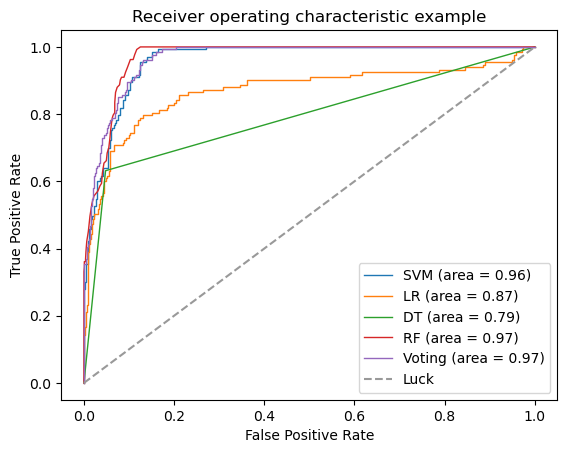

In [40]:
#绘制各模型的ROC曲线，输出AUC。建议，尝试将多个模型的ROC绘制在一幅图中。

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 绘制ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, classifier1.predict_proba(X_test)[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='SVM (area = %0.2f)' % (roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, classifier2.predict_proba(X_test)[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='LR (area = %0.2f)' % (roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, classifier3.predict_proba(X_test)[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='DT (area = %0.2f)' % (roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, classifier4.predict_proba(X_test)[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='RF (area = %0.2f)' % (roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, classifier5.predict_proba(X_test)[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Voting (area = %0.2f)' % (roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

